#  Mozilla-Outreachy-DataScience-2019 Internship 
* ### _For prospective 2019 Outreachy interns to contribute Mozilla Data Science team projects._

## House Price Predictions (based on Kaggle competition)
## Contribution 1 Tasks:
* ### Load the data into R or Python
    * Notebooks (e.g. Jupyter) make us smile, but scripts work too.
* ### Perform exploratory data analysis.
    * Be verbose as to what you are looking at and why.
    * Keep in mind the primary task below.
* ### Perform data cleaning, if necessary.
    * Again, explain your methodology and reasoning behind it.
* ### Primary Task - Answer the following questions:
    * Which single field in dataset.csv best describes the SalePrice field?
    * Why did you choose this field? Please thoroughly explain your reasoning.
    
## Contribution 2 Task:
* ### Train a regression model predicting SalePrice for the other fields in dataset.csv
    * A simple model is fine here. We are concerned with the reasoning as to your model choice, not on how well it performs.


    
### Additional Information:
    * Visualizations make the world a better place! Use them liberally.
    * Show your code as much as possible.
    * Please also explain your code and your thinking process thoroughly and articulately.
    * If your model makes assumptions of the data, please show and discuss how valid these assumptions are.
    * Write in English as well as in code.
    * 3rd party libraries are fine. Just make sure to describe why and how you are using them.


# Part 0: Import, Settings , Load Data
* ### Import, Create settings, Read data from ‘dataset.csv’ file

# Part 1: Exploratory Data Analysis
* ### Info, Head, Check for duplicates 
* ### Observation of target variable 'SalePrice' (visualisation: distplot)
* ### Missing Data
    * #### List of data features with missing values (visualisation: bartplot)
    * #### Filling missing values
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
    * #### Numerical features:
    
        * Visualisation of Numerical features (regplot)
        * Outliers (visualisation: scatter plot)
        * List of Numerical features with strong and weak correlation to target
        * Skewness and Kurtosis calculations 
        * Log transformation of target variable 'SalePrice' and one Numerical feature (visualisation: distplot)
        * Recalculation of Numerical features with strong and weak correlation to target
        * Drop Numerical features with weak correlation + 'ID'
        * Visualisation of Numerical features with the strongest correlation to target (heatmap)

    * #### Categorical Features:
        * Visualisation for Categorical features (boxplot)
        * Convert Categorical into Numerical features  
        * Drop all Categorical features 
        * Visualisation of Encoded Categorical features (barplot)   

    * #### List of all data features (Numerical and Encoded Categorical) with strong and weak correlation to target
    * #### Drop all data features with weak correlation
    * #### List of all data features with strong correlation to target
    * #### Visualisation of all data features with strong correlation to target (heatmap)

# Part 2: Data Wrangling and Transformation
* ### Multicollinearity
* ### Dummys
* ### StandardScaler
* ### Creating datasets for ML Part

# Part 3: Machine Learning
* ### K-fold cross-validation method, Error metrics
* ### Regression model:
    * #### Elastic Net
* ### Submission of ‘.csv’ file


# Part 0: Import, Settings, Load Data
* ### Import 

In [325]:
# import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# report warnings
import warnings
warnings.filterwarnings('ignore')

# import models
from sklearn import linear_model
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error


* ### Create settings

In [326]:
# minimum correlation value equal 0.4
min_value_corr = 0.4   

* ### Read data from ‘dataset.csv’ file


In [327]:
# read data from 'dataset.csv' file
train = pd.read_csv('dataset.csv') 



# Part 1: Exploratory Data Analysis
* ### Info

In [328]:
# print the full summary of the dataset  
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Dataset consists of 1460 rows and 81 variables or fields or features; 

has 3 datatypes: float64(3), int64(35), object(43);

some features have too many missing values (such as 'Alley', 'PoolQC' and 'MiscFeature').

* ### Head

In [329]:
# preview of the first 5 lines of the loaded data 
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* ### Check for duplicates

In [330]:
# check for duplicates 
unique_id = len(set(train.Id))
total_id = train.shape[0]
duplic_id = total_id - unique_id
print("There are " + str(duplic_id) + " duplicate IDs for " + str(total_id) + " rows.")


There are 0 duplicate IDs for 1460 rows.



* ### Observation of target variable 'SalePrice' (visualisation: distplot)

'SalePrice' variable - this is a target we are trying to predict.
The following shows how the target is distributed.

In [331]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**'Skewness'** and **'Kurtosis'** - are two statistics that will describe the shape of the distribution and implemented hereunder.

Skewness: 1.882876
Kurtosis: 6.536282


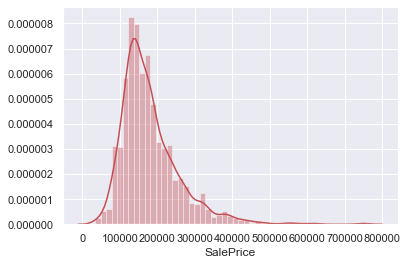

In [332]:
# visualisation of 'SalePrice' distribution
sns.distplot(train['SalePrice'], color='r')

# skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())


The plot above shows that the target variable 'SalePrice' is not normally distributed - it is skewed to the left and high kurtosis shows a heavy tail, or outliers.

This is a problem since most Machine Learning (ML) models don't do well with non-normally distributed data. 

This is just an observation but will be fixed further on.


* ### Missing Data

As had been noticed before at **data.info()**, our dataset contains a lot of missing data presented as NaN values.
Firstly, these NaN values have to be found.

 * #### List of data features with missing values (visualisation: bartplot)

In [333]:
# list of features with missing values

total = \
    train.isnull().sum().sort_values(ascending=False)[train.isnull().sum().sort_values(ascending=False)
        != 0]
percent = round(train.isnull().sum().sort_values(ascending=False)
                / len(train) * 100,
                2)[round(train.isnull().sum().sort_values(ascending=False)
                   / len(train) * 100, 2) != 0]
missing_data = pd.concat([total, percent], axis=1, keys=['Total',
                         'Percent'])
missing_data

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


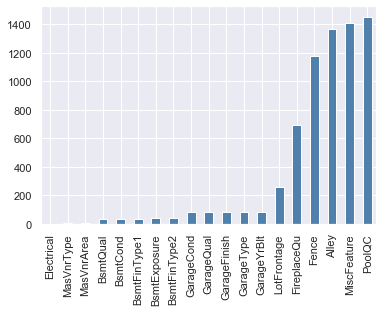

In [334]:
# visualisation of fields with missing values
sns.set_style('darkgrid')

missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='#5081ac')

In [335]:
# columns which have NaN values 
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print("There are " + str(len(nan_columns)) +" columns with NaN values for 1460 rows.")
nan_columns

There are 19 columns with NaN values for 1460 rows.


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']


Looking at the _'data_description'_ file and our 'dataset.csv' file it can be seen that a lot of the NaNs 
are not true missing values, but rather indicate that the property does not
have that feature. For example, a property with NaN garage type has no garage.

This information has to be preserved.
So NaNs will be replaced with the string 'None' in the Categorical features, and with 'mean' for the Numeric features, where this applies.

 * #### Filling missing values

Fields where NaN values have meaning - all these fields are Categorical features.

Explaining in further depth:

* 'Alley': Type of alley access to property - No alley access
* 'BsmtQua'l:  Evaluates the height of the basement - No Basement
* 'BsmtCond':  Evaluates the general condition of the basement - No Basement
* 'BsmtExposure': Refers to walkout or garden level walls - No Basement
* 'BsmtFinType1': Rating of basement finished area - No Basement
* 'BsmtFinType'2: Rating of basement finished area - No Basement
* 'FireplaceQu':  Fireplace quality - No Fireplace
* 'GarageType':   Garage location - No Garage
* 'GarageFinish': Interior finish of the garage - No Garage
* 'GarageQual':   Garage quality - No Garage
* 'GarageCond':   Garage condition - No Garage
* 'PoolQC':       Pool quality - No Pool
* 'Fence':        Fence quality - No Fence
* 'MiscFeature':  Miscellaneous feature not covered in other categories - None
* 'MasVnrType':   Masonry veneer type - None

'Electrical' is a special case: in the _'data_description.txt'_ file, it is a Categorical feature that does not have NaN value, 
but in the _'dataset.csv'_ file we can find 1 NaN (probably it is a mistake, but this happens all the time in real life).

I made a decision to replace NaN with 'None' since it is Categorical feature.


In [336]:
# NaN columns to fill
nan_columns_fill = [
    'PoolQC',
    'MiscFeature',
    'Alley',
    'Fence',
    'MasVnrType',
    'FireplaceQu',
    'GarageQual',
    'GarageCond',
    'GarageFinish',
    'GarageType',
    'BsmtExposure',
    'BsmtCond',
    'BsmtQual',
    'BsmtFinType1',
    'BsmtFinType2',
    'Electrical',
    ]
print('There are ' + str(len(nan_columns_fill)) + ' columns with NaN values for 1460 rows.')

There are 16 columns with NaN values for 1460 rows.


In [337]:
# replace 'NaN' with 'None' in these columns
for col in nan_columns_fill:
    train[col].fillna('None',inplace=True)

In [338]:
# recalculation of columns with NaN values 
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
nan_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan_columns.head()

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice,0,0.000000
ExterCond,0,0.000000


**'LotFrontage', 'GarageYrBl't** and **'MasVnrArea'** are a Numerical features with NaN values and 'mean' will be applied for filling.

In [339]:
# fillna with mean for the remaining columns
train.fillna(train.mean(), inplace = True)

Missing data will now be checked again.

In [340]:
train.isnull().sum().sum()

0

In [341]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

The above list shows no new Missing data therefore this is complete.

Next is to observe Numerical and Categorical features.

* ### Numerical and Categorical features
* #### List of Numerical and Categorical features

In [342]:
# check for Numerical and Categorical features
numerical_feats = train.dtypes[train.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats))
print ()
print (train[numerical_feats].columns)
print ()
categorical_feats = train.dtypes[train.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats))
print ()
print (train[categorical_feats].columns)

Quantity of Numerical features:  38

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Quantity of Categorical features:  43

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'B

* #### Numerical features:

In [343]:
# preview of the first 5 lines of the Numerical features
train[numerical_feats].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


* #### Visualisation  of Numerical features (regplot)

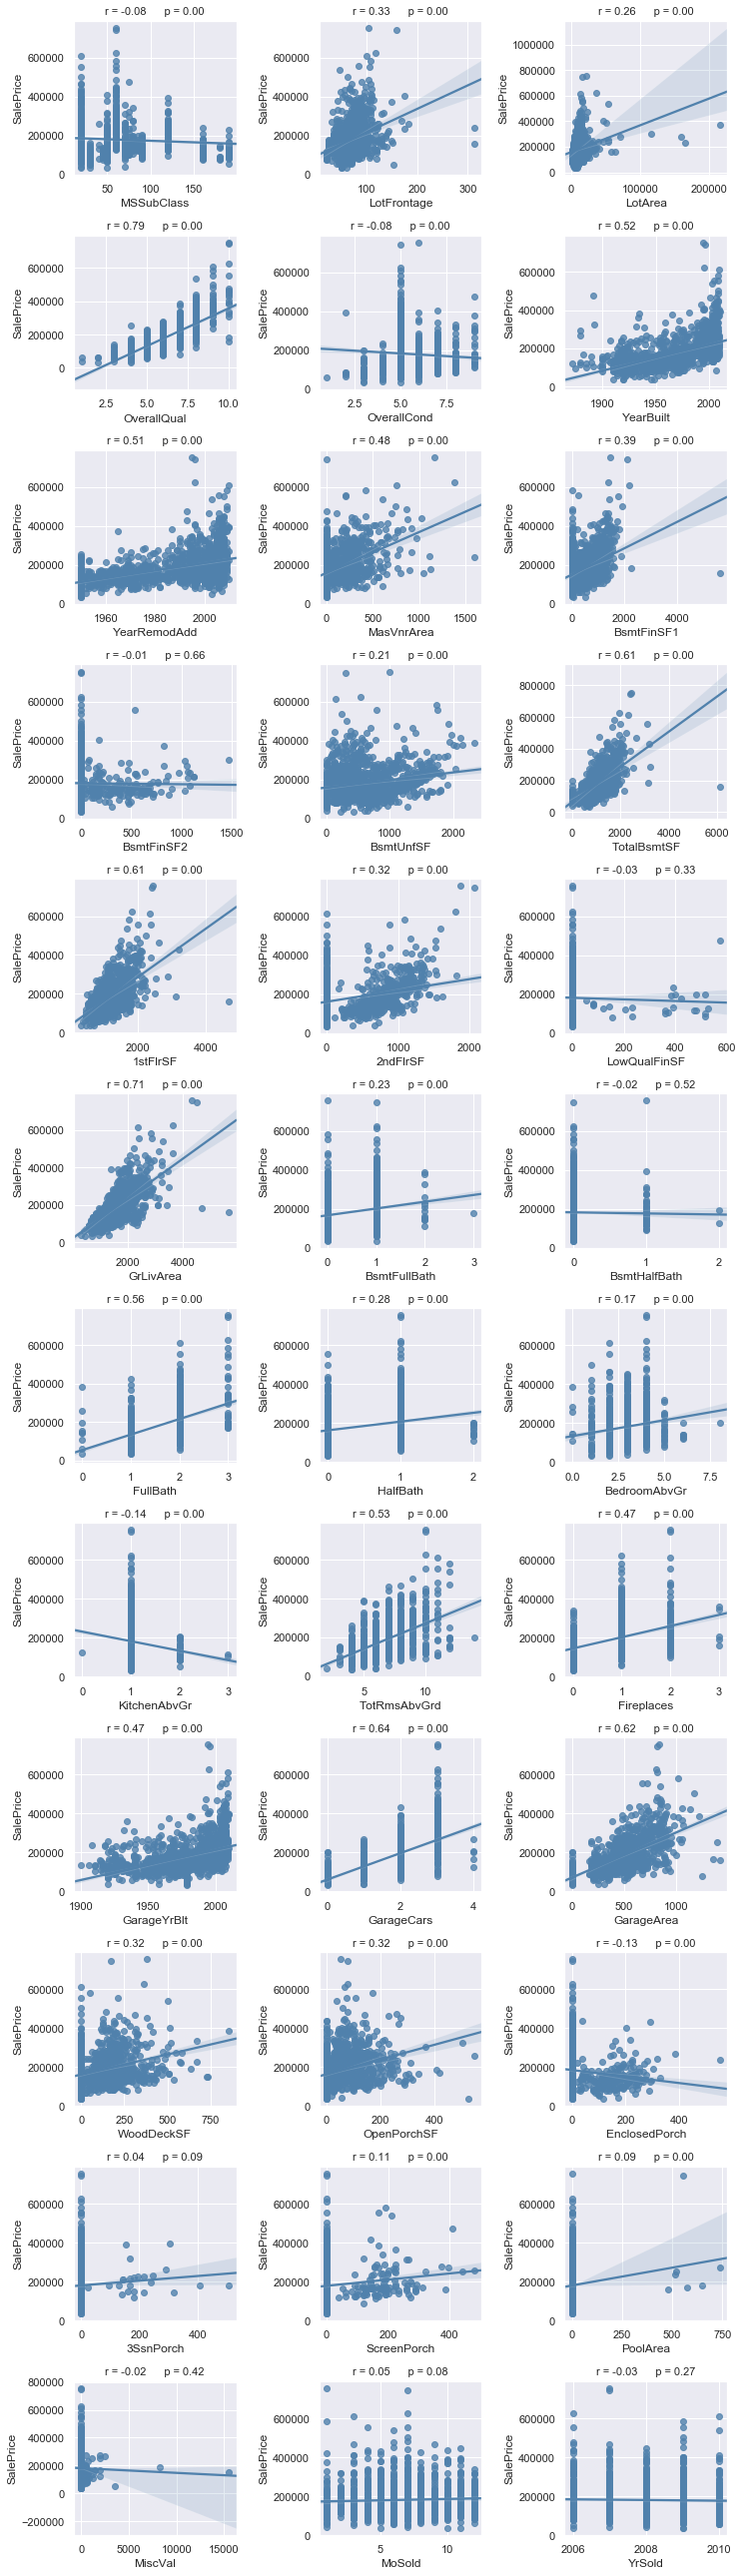

In [344]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

num_feats = list(numerical_feats)
not_plot = ['Id',  'SalePrice']
plot_num_feats = [c for c in list(numerical_feats) if c not in not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(train[plot_num_feats[i]], train['SalePrice'], ax = axs[r][c], color = "#5081ac" )
            stp = stats.pearsonr(train[plot_num_feats[i]], train['SalePrice'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



plt.tight_layout()    
plt.show()



Plot shows that some Numerical features (including target 'SalePrice') does not have a normal distribution so 
these should be transformed.
Before doing this, outliers have to be dealt with.

* #### Outliers (visualisation: scatter plot)


'GrLivArea' feature has an inconsistency.
It is possible that houses with a living area around 4500 square meters could cost more than 700000.
But that houses with a living area around 4700 and 5800 square meters could cost less than 200000 - this seems strange.
Therefore it has been decided to drop these two inconsistencies.

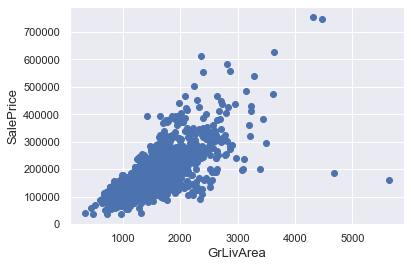

In [345]:
# plot showing 'GrLivArea' inconsistencies
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

In [346]:
# drop of inconsistencies
train = train.drop(
    train[(train['GrLivArea'] >4500) & (train['SalePrice'] <200000)].index)

'OverallQual' feature have an inconsistancy.
Houses with 'Very Excellent' condition can not cost less than 200000.
So, i decided to drop this 2 inconsistatcies.

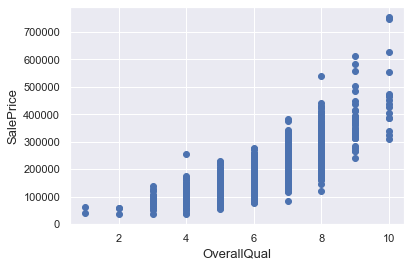

In [347]:
# plot showing 'GrLivArea' inconsistencies
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('OverallQual', fontsize = 13)
plt.show()

In [348]:
# drop of inconsistencies
train = train.drop(
    train[(train['OverallQual'] == 10.0) & (train['SalePrice'] <220000)].index)

Outliers are complete.

* #### List of Numerical features with strong and weak correlation to target

Columns with strong and weak correlation to target need to be found.

In [349]:
corr = train.corr()
corr_abs = corr.abs()

num_cols = len(numerical_feats)
num_corr = corr_abs.nlargest(num_cols, 'SalePrice')['SalePrice']

cols_abv_corr_limit = list(num_corr[num_corr.values > min_value_corr].index)
cols_blw_corr_limit = list(num_corr[num_corr.values <= min_value_corr].index)


In [350]:
# list of Numerical features and their correlation coefficient to target
print(num_corr)
print()
print("Numerical features with correlation above min value :")
print(cols_abv_corr_limit)
print()
print("Numerical features with correlation below min value :")
print(cols_blw_corr_limit)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
MasVnrArea       0.480463
GarageYrBlt      0.470844
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.352798
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
KitchenAbvGr     0.135946
EnclosedPorch    0.128646
ScreenPorch      0.111415
PoolArea         0.099490
MSSubClass       0.084276
OverallCond      0.077948
MoSold           0.046124
3SsnPorch        0.044568
YrSold           0.028882
LowQualFinSF     0.025625
Id               0.021673
MiscVal          0.021203
BsmtHalfBath     0.016881
BsmtFinSF2       0.011422
Name: SalePr

* #### Skewness and Kurtosis calculations 

Returning to Numerical features transformation.
Starting with a check for _'skewness'_ and _'kurtosis'_.

In [351]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.57
LotFrontage     Skewness: 01.69     Kurtosis: 014.64
LotArea         Skewness: 12.57     Kurtosis: 213.59
OverallQual     Skewness: 00.20     Kurtosis: 000.07
OverallCond     Skewness: 00.69     Kurtosis: 001.10
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.70     Kurtosis: 010.43
BsmtFinSF1      Skewness: 00.76     Kurtosis: -00.11
BsmtFinSF2      Skewness: 04.25     Kurtosis: 020.08
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 00.51     Kurtosis: 001.77
1stFlrSF        Skewness: 00.89     Kurtosis: 001.12
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.56
LowQualFinSF    Skewness: 09.00     Kurtosis: 083.11
GrLivArea       Skewness: 01.01     Kurtosis: 002.06
BsmtFullBath    Skewness: 00.59     Kurtosis: -00.86
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

The list above is heavily populated with numbers. To aid understanding for analysis purposes, the data will now be portrayed in graphical plot below.

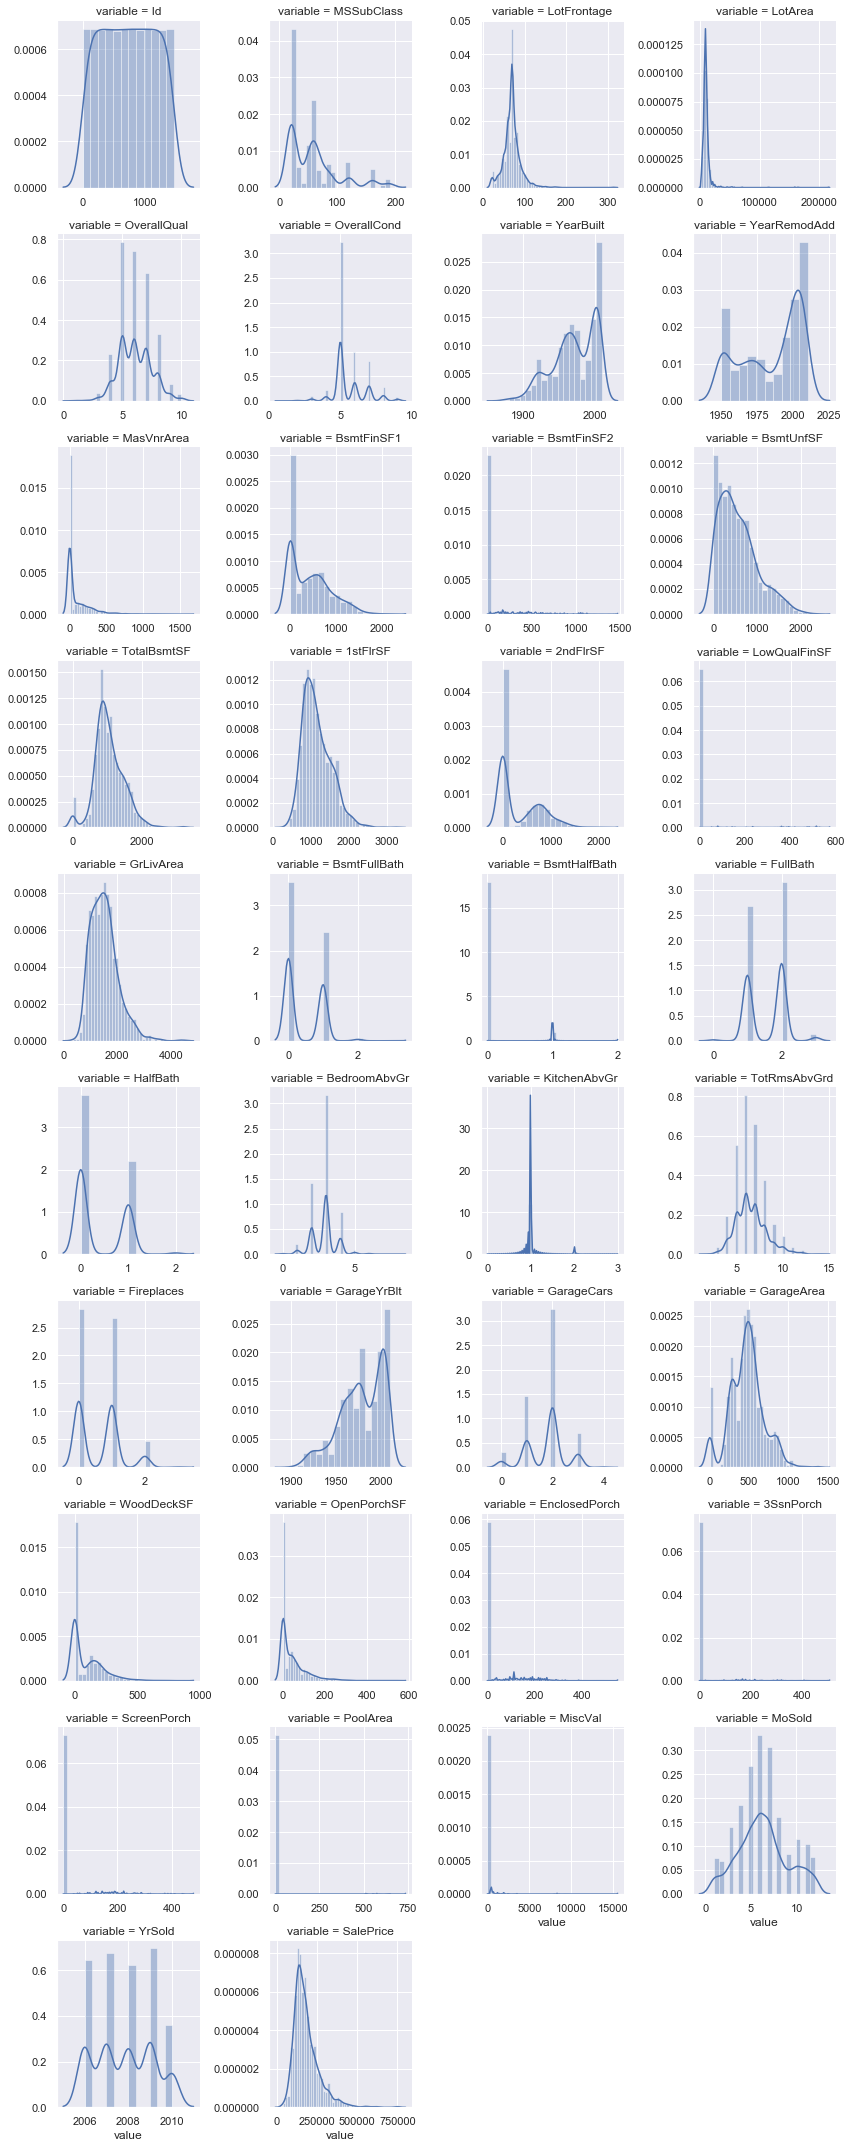

In [352]:
# visualisation of Numeric features after 'Skewness' and 'Kurtosis'
f = pd.melt(train, value_vars=numerical_feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

The overall picture is more clear.

It shows that target 'SalePrice' needs to be distributed.
It shows that 'GrLivArea' is numerically the closest feature to the target.

Therefore **'log'** transformation will be applied to both. 

* #### Log transformation of target variable 'SalePrice' and one Numerical feature (visualisation: distplot)


As was seen earlier, the target variable 'SalePrice' is not normally distributed - it was skewed to the left 
and high kurtosis showed a heavy tail, or outliers. 
This is a problem because most ML models don't do well with non-normally distributed data. 


Skewness: 1.881296
Kurtosis: 6.523067


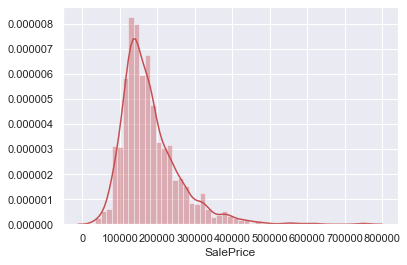

In [353]:
# visualisation of 'SalePrice' distribution
sns.distplot(train['SalePrice'], color = "r");

# skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

**'log'** needs to be applied in order to have a better distribution.

Skewness: 0.121568
Kurtosis: 0.804764


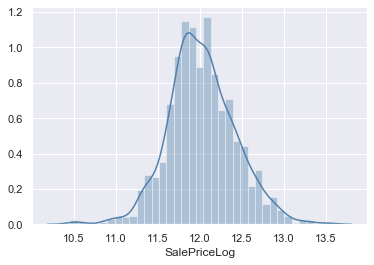

In [354]:
# apply 'log' to 'SalePrice' and change name to 'SalePriceLog'
train['SalePriceLog'] = np.log(train['SalePrice'])

#visualisation of 'SalePriceLog' distribution
sns.distplot(train['SalePriceLog'], color = "#5081ac");

# skewness and kurtosis
print("Skewness: %f" % train['SalePriceLog'].skew())
print("Kurtosis: %f" % train['SalePriceLog'].kurt())

# drop old 'SalePrice' column
train.drop('SalePrice', axis = 1, inplace = True)

The SalePrice is now normally distributed.
The same procedure will be repeated with 'GrLivArea'.

Skewness: 1.010992
Kurtosis: 2.063463


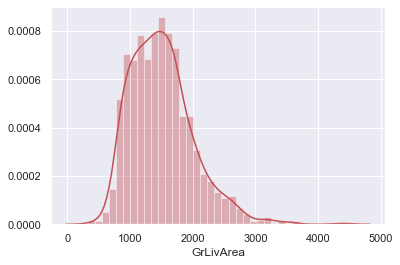

In [355]:
# visualisation of 'GrLivArea' distribution
sns.distplot(train['GrLivArea'], color= 'r');

# skewness and kurtosis
print("Skewness: %f" % train['GrLivArea'].skew())
print("Kurtosis: %f" % train['GrLivArea'].kurt())

In [356]:
# apply 'log' to 'GrLivArea' and change name to 'GrLivAreaLog'
for df in [train]:
    df['GrLivAreaLog'] = np.log(df['GrLivArea'])
    # drop old feature 'GrLivArea'
    df.drop('GrLivArea', inplace= True, axis = 1)
        
numerical_feats = train.dtypes[train.dtypes != "object"].index

Skewness: -0.071819
Kurtosis: 0.096331


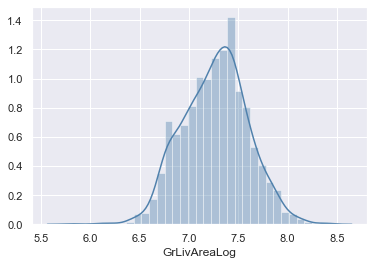

In [357]:
# visualisation of 'GrLivAreaLog' distribution
sns.distplot(train['GrLivAreaLog'], color = "#5081ac");
# skewness and kurtosis
print("Skewness: %f" % train['GrLivAreaLog'].skew())
print("Kurtosis: %f" % train['GrLivAreaLog'].kurt())

* #### Recalculation of Numerical features with strong and weak correlation to target

Next, Numerical features with strong and weak correlation to target, need to be recalculated.

In [358]:
corr = train.corr()
corr_abs = corr.abs()

num_cols = len(numerical_feats)
num_corr = corr_abs.nlargest(num_cols, 'SalePriceLog')['SalePriceLog']

cols_abv_corr_limit = list(num_corr[num_corr.values > min_value_corr].index)
cols_blw_corr_limit = list(num_corr[num_corr.values <= min_value_corr].index)

In [359]:
print(num_corr)
print()
print("Numerical features with correlation above min value :")
print(cols_abv_corr_limit)
print()
print("Numerical features with correlation below min value :")
print(cols_blw_corr_limit)

SalePriceLog     1.000000
OverallQual      0.821404
GrLivAreaLog     0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
LotArea          0.260544
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: SalePr

* #### Drop Numerical features with weak correlation + 'ID'

Only those Numerical features with strong correlation will be used in the ML testing later.

Features with weak correlation will be deleted.

'ID' also needs to be dropped since it does not consist of important data we need to test in ML.

In [360]:
train_id = train['Id']

num_cols_to_drop  = cols_blw_corr_limit

cols_to_drop = ['Id'] + num_cols_to_drop 

for df in [train]:
    df.drop(cols_to_drop, inplace = True, axis = 1)

Next, the quantity of Numerical features and their names will presented.

In [361]:
# check for Numerical features
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Quantity of Numerical features: ", len(numerical_feats))
print()
print(train[numerical_feats].columns)

Quantity of Numerical features:  14

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePriceLog', 'GrLivAreaLog'],
      dtype='object')


* #### Visualisation of Numerical features with the strongest correlation to target (visualisation: heatmap)

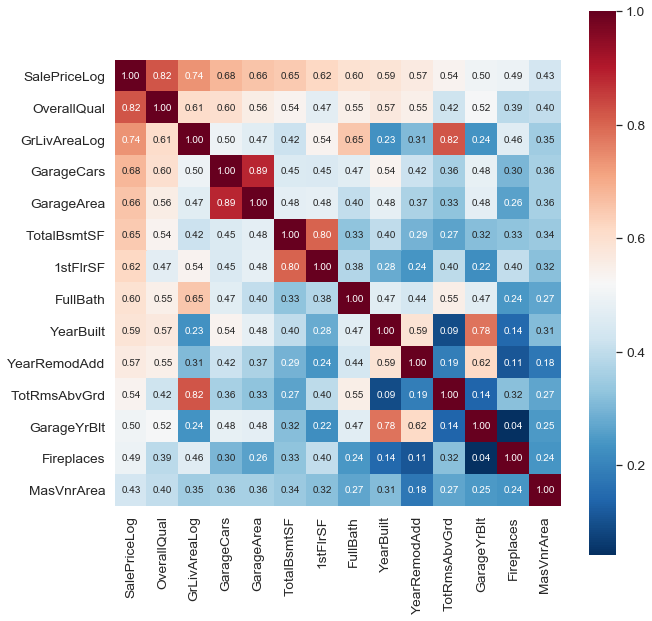

In [362]:
# correlation matrix for 14 numerical features with the strongest correlation to target
k = 14 # number of variables for heatmap
cols = corr.nlargest(k, 'SalePriceLog')['SalePriceLog'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize = (10, 10))
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', \
                 annot_kws = {'size': 10}, cmap = 'RdBu_r', yticklabels = cols.values, xticklabels = cols.values)
plt.show()

At this level, the 'leader' with the strongest correlation to target in Numerical features is: **'OverallQual'**.

But Categorical features still need to be analysed. The leadership can be changed.

Numerical features is now complete, and next is Categorical features.


* #### Categorical Features:


Next is to observe Categorical features.

In [363]:
# preview of the first 5 lines of the Categorical features
train[categorical_feats].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


* #### Visualisation of Categorical features (boxplot)


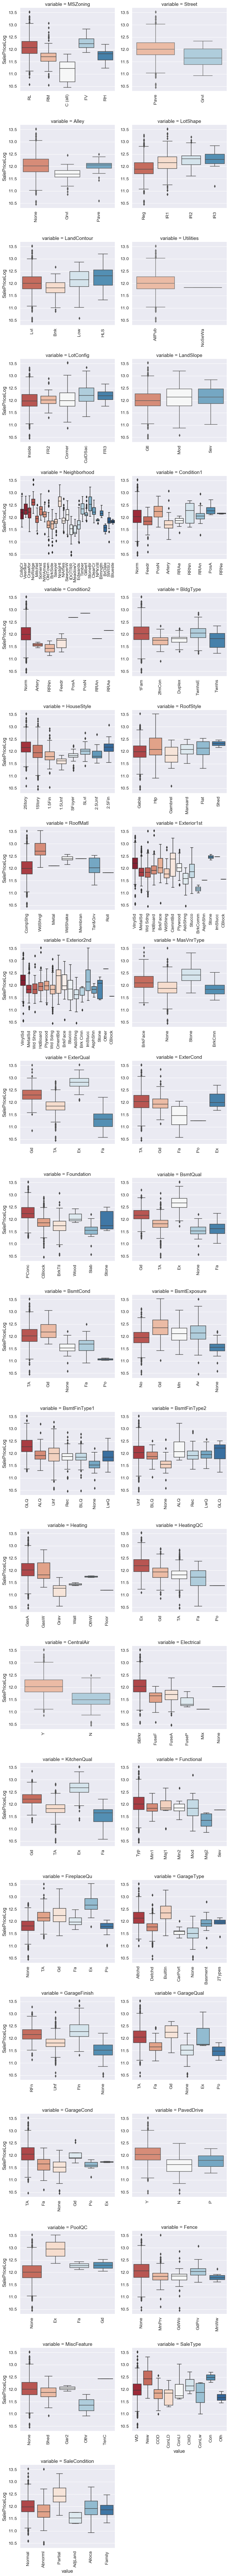

In [364]:
for c in categorical_feats:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].fillna('None')

def boxplot(x, y, **kwargs):
    sns.boxplot(x = x, y = y, palette = 'RdBu')
    x = plt.xticks(rotation = 90)
f = pd.melt(train, id_vars = ['SalePriceLog'], value_vars = categorical_feats)
g = sns.FacetGrid(f, col = "variable",  col_wrap = 2, sharex = False, sharey = False, height = 5 )
g = g.map(boxplot, "value", "SalePriceLog")


In order to analyse Categorical features (and use them later for ML testing) they need to be
converted into Numerical.

* #### Convert Categorical into Numerical features 

In [365]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePriceLog']].groupby(feature).mean()['SalePriceLog']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0] + 1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature +'_E'] = o
    
categorical_encod = []
for q in categorical_feats:  
    encode(train, q)
    categorical_encod.append(q +'_E')

print("Quantity of Encoded Categorical features: ", len(categorical_encod))
print()
print(train[categorical_encod].columns)

Quantity of Encoded Categorical features:  43

Index(['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E',
       'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E',
       'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E',
       'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E',
       'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E',
       'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E',
       'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E',
       'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E',
       'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E',
       'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E',
       'SaleCondition_E'],
      dtype='object')


* #### Drop all Categorical features 

Now with new Encoded Categorical we can drop the old Categorical features.

In [366]:
# drop old categorical features
to_drop_col  = categorical_feats

cols_to_drop =  to_drop_col 

for df in [train]:
    df.drop(cols_to_drop, inplace = True, axis = 1)

* #### Visualisation of Encoded Categorical features (barplot)

Visualisation will be applied in order to investigate the relation of the Encoded Categorical features to the target in more detail.
Also, we look at the 'mean' of 'SalePrice' as function of category.

The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

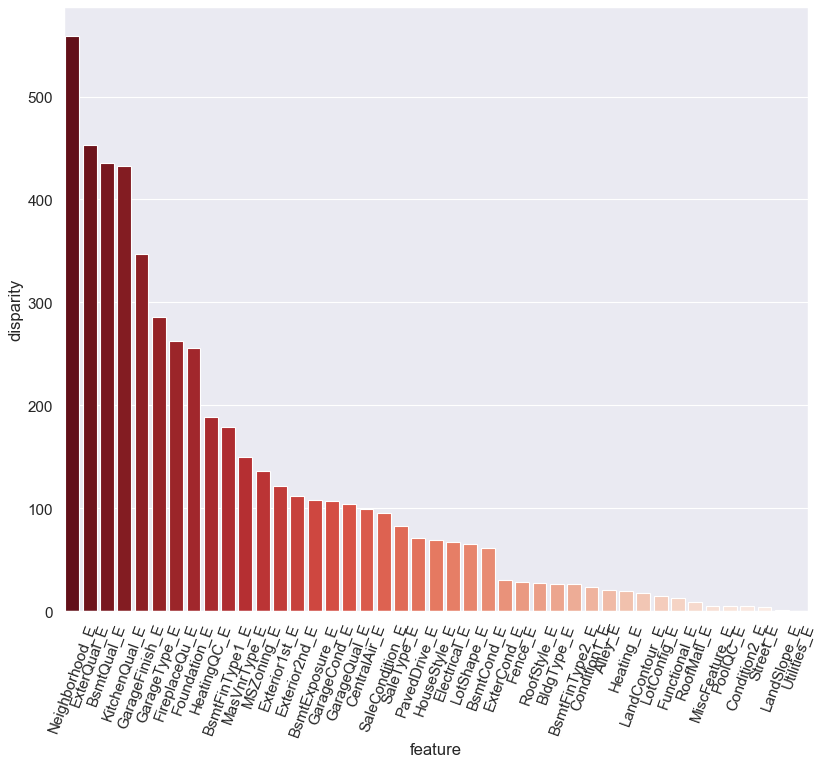

In [367]:
# visualisation of all Encoded Categorical features and its correlation to the target. 
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical_encod
    pvals = []
    for c in categorical_encod:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePriceLog'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

plt.figure(figsize=(12,10), dpi= 80)

a = anova(train)
a['disparity'] = np.log(1. / a['pval'].values)
sns.barplot(data = a, x = 'feature', y = 'disparity', palette = 'Reds_r')
x = plt.xticks(rotation=70)

 

Plot shows that number of features (like 'Neighborhood_E', 'ExterQual_E', 'BsmtQual_E', 'KitchenQual_E') 
have a strong correlation to 'SalePrice'.

At this level, the 'leader' with the strongest correlation to target in Categorical features is: **'Neighborhood_E'**


* #### List of all data features (Numerical and Encoded Categorical) with strong and weak correlation to target

Next, columns with strong and weak correlation to target in all data features (Numerical and Encoded Categorical) have to be found.

In [368]:
corr = train.corr()
corr_abs = corr.abs()

num_cols = len(train)
num_corr = corr_abs.nlargest(num_cols, 'SalePriceLog')['SalePriceLog']

cols_abv_corr_limit = list(num_corr[num_corr.values > min_value_corr].index)
cols_blw_corr_limit = list(num_corr[num_corr.values <= min_value_corr].index)

In [369]:
# list of all data features (Numerical and Encoded Categorical) and their correlation to target
print(num_corr)
print()
print("Numerical features with correlation above min value :")
print(cols_abv_corr_limit)
print()
print("Numerical features with correlation below min value :")
print(cols_blw_corr_limit)

SalePriceLog       1.000000
OverallQual        0.821404
Neighborhood_E     0.743358
GrLivAreaLog       0.737427
ExterQual_E        0.682225
GarageCars         0.681033
KitchenQual_E      0.669989
GarageArea         0.656128
BsmtQual_E         0.649133
TotalBsmtSF        0.647563
1stFlrSF           0.620500
GarageFinish_E     0.605602
FullBath           0.595899
YearBuilt          0.587043
GarageType_E       0.575844
YearRemodAdd       0.565992
Foundation_E       0.550759
FireplaceQu_E      0.547630
TotRmsAbvGrd       0.537702
GarageYrBlt        0.500842
Fireplaces         0.491998
HeatingQC_E        0.473938
MasVnrArea         0.433353
MasVnrType_E       0.431651
MSZoning_E         0.410584
Exterior1st_E      0.410457
Exterior2nd_E      0.402901
BsmtFinType1_E     0.396868
GarageCond_E       0.377614
BsmtExposure_E     0.358410
GarageQual_E       0.358358
CentralAir_E       0.351598
SaleType_E         0.344056
HouseStyle_E       0.315180
Electrical_E       0.309378
PavedDrive_E       0

* #### Drop all data features with weak correlation

Only those features with strong correlation will be used in the ML testing later.

The value with weak correlation will be deleted.

In [370]:
# drop of all data features (Numerical and Encoded Categorical) with weak correlation.
all_cols = len(train)
num_corr = corr_abs.nlargest(all_cols, 'SalePriceLog')['SalePriceLog']

cols_blw_corr_limit = list(num_corr[num_corr.values <= min_value_corr].index)

for df in [train] :
    
    df.drop(cols_blw_corr_limit, inplace= True, axis = 1) 

* #### List of all data features with strong correlation to target

Next, probable candidate features for ML testing have to be found.

In [371]:
# list of all data features (Numerical and Encoded Categorical) with strong correlation to target
corr = train.corr()
corr_abs = corr.abs()

all_cols = len(train)
num_catenc_corr = corr_abs.nlargest(all_cols, 'SalePriceLog')['SalePriceLog']

print(num_catenc_corr)

SalePriceLog      1.000000
OverallQual       0.821404
Neighborhood_E    0.743358
GrLivAreaLog      0.737427
ExterQual_E       0.682225
GarageCars        0.681033
KitchenQual_E     0.669989
GarageArea        0.656128
BsmtQual_E        0.649133
TotalBsmtSF       0.647563
1stFlrSF          0.620500
GarageFinish_E    0.605602
FullBath          0.595899
YearBuilt         0.587043
GarageType_E      0.575844
YearRemodAdd      0.565992
Foundation_E      0.550759
FireplaceQu_E     0.547630
TotRmsAbvGrd      0.537702
GarageYrBlt       0.500842
Fireplaces        0.491998
HeatingQC_E       0.473938
MasVnrArea        0.433353
MasVnrType_E      0.431651
MSZoning_E        0.410584
Exterior1st_E     0.410457
Exterior2nd_E     0.402901
Name: SalePriceLog, dtype: float64


In [372]:
num_catenc_corr = train.dtypes[train.dtypes != "object"].index
print ("New train features: Numerical + Encoded Categorical.")
print ("Quantity of new train features: ", len(num_catenc_corr))

New train features: Numerical + Encoded Categorical.
Quantity of new train features:  27


In [373]:
# preview of the first 5 lines of data features (Numerical and Encoded Categorical)
train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,...,Exterior2nd_E,MasVnrType_E,ExterQual_E,Foundation_E,BsmtQual_E,HeatingQC_E,KitchenQual_E,FireplaceQu_E,GarageType_E,GarageFinish_E
0,7,2003,2003,196.0,856,856,2,8,0,2003.0,...,14.0,3.0,3.0,6.0,4.0,5.0,3.0,2.0,6.0,3.0
1,6,1976,1976,0.0,1262,1262,2,6,1,1976.0,...,7.0,2.0,2.0,3.0,4.0,5.0,2.0,4.0,6.0,3.0
2,7,2001,2002,162.0,920,920,2,6,1,2001.0,...,14.0,3.0,3.0,6.0,4.0,5.0,3.0,4.0,6.0,3.0
3,7,1915,1970,0.0,756,961,1,7,1,1998.0,...,8.0,2.0,2.0,2.0,3.0,4.0,3.0,5.0,3.0,2.0
4,8,2000,2000,350.0,1145,1145,2,9,1,2000.0,...,14.0,3.0,3.0,6.0,4.0,5.0,3.0,4.0,6.0,3.0


* #### visualisation of all data features with strong correlation to target (heatmap)

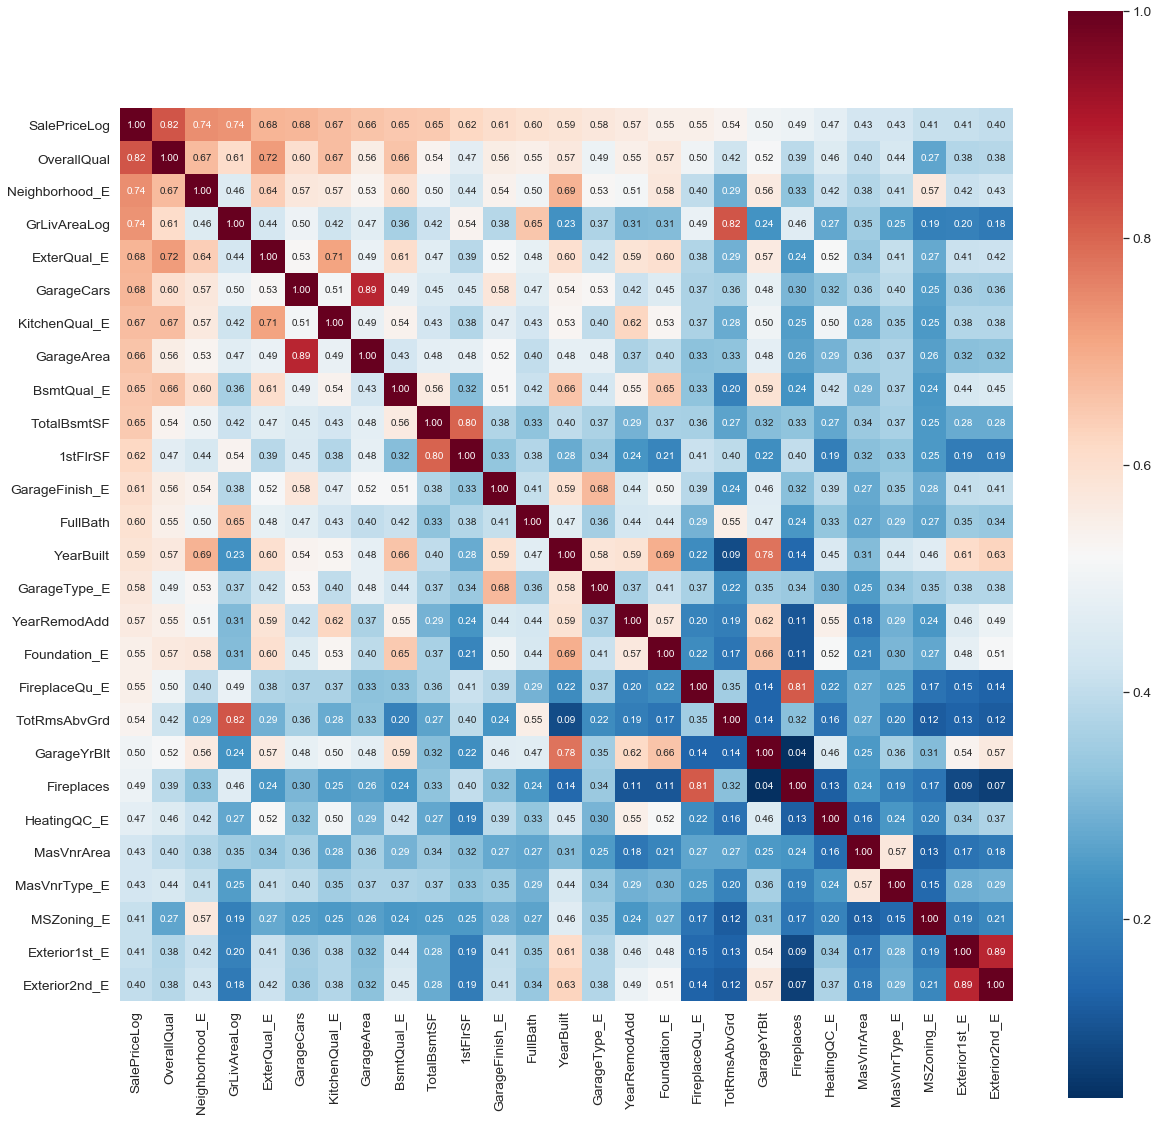

In [374]:
# correlation matrix for 27 features with the strongest correlation to target
k = 27  # number of variables for heatmap
cols = corr.nlargest(k, 'SalePriceLog')['SalePriceLog'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
(f, ax) = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    cmap='RdBu_r',
    yticklabels=cols.values,
    xticklabels=cols.values,
    )
plt.show()

**27** probable candidate features for ML Part, have been found. These candidate features are only probable for now. 

One further step called **Multicollineality**, needs to be performed in order to create a final list of features for ML testing.

# Part 2: Data Wrangling and Transformation
* ### Multicollinearity


**Multicollinearity** refers to predictors that are correlated with other predictors. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other.

From the Correlation matrix above, a number of features with strong correlation to similar features, have been identified.

**GrivArea_Log and TotRmsAbvGrd**

**GarageCars and GarageArea**

**TotalBsmtSF and 1stFlrSF**

**YearBuilt and GarageYrBlt**

**FireplaceQu_E and Fireplaces**

**Exterior1st_E and Exterior2nd_E**

In order to avoid Multicollineality, one of the paired features that has smaller correlation coeffiecient to target 
needs to be dropped.

These are: **'TotRmsAbvGrd', 'GarageArea', '1stFlrSF', 'GarageYrBlt', 'Fireplaces', 'Exterior2nd_E'.**

In [375]:
cols_to_drop = [
    'TotRmsAbvGrd',
    'GarageArea',
    '1stFlrSF',
    'GarageYrBlt',
    'Fireplaces',
    'Exterior2nd_E',
    ]

for df in [train]:
    df.drop(cols_to_drop, inplace=True, axis=1)

Next, is check for what features are left over after drop.

In [376]:
cols = list(train)
print(cols)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'SalePriceLog', 'GrLivAreaLog', 'MSZoning_E', 'Neighborhood_E', 'Exterior1st_E', 'MasVnrType_E', 'ExterQual_E', 'Foundation_E', 'BsmtQual_E', 'HeatingQC_E', 'KitchenQual_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E']


In [377]:
# list of all data features (Numerical and Encoded Categorical) with strong correlation to target 
corr = train.corr()
corr_abs = corr.abs()

all_cols = len(train)
num_catenc_corr = corr_abs.nlargest(all_cols, 'SalePriceLog')['SalePriceLog']

print(num_catenc_corr)

SalePriceLog      1.000000
OverallQual       0.821404
Neighborhood_E    0.743358
GrLivAreaLog      0.737427
ExterQual_E       0.682225
GarageCars        0.681033
KitchenQual_E     0.669989
BsmtQual_E        0.649133
TotalBsmtSF       0.647563
GarageFinish_E    0.605602
FullBath          0.595899
YearBuilt         0.587043
GarageType_E      0.575844
YearRemodAdd      0.565992
Foundation_E      0.550759
FireplaceQu_E     0.547630
HeatingQC_E       0.473938
MasVnrArea        0.433353
MasVnrType_E      0.431651
MSZoning_E        0.410584
Exterior1st_E     0.410457
Name: SalePriceLog, dtype: float64


At this point the answer for **Contribution 1 Primary Task** can be stated:

**_Which single field in dataset.csv best describes the SalePrice field?_** 
    
       'OverallQual'
   
**_Why did you choose this field?_**
    
    After applying the statistical and analytical techniques above (such as: finding/filling missing data, finding/removing outliers, Skewness/Kurtosis calculations, Log transformation, calculation of strong and weak correlation to target, dropping unnecessary features, lots of visualisation, multicollineality), as a result of its calculations, 'OverallQual' field showed the highest correlation with the target 'SalePrice'. Therefore, it was choosen.
    

Next, the **target** has to be dropped. 
It was not done before, in order to transform, callibrate and prepare all data from the dataset for future ML testing.

In [378]:
new_feats = cols.copy()
# drop 'SalePriceLog'
new_feats.remove('SalePriceLog')

# print quantity and name of new features 
print ('Quantity of New features: ', len(new_feats))
print ()
print (train[new_feats].columns)

Quantity of New features:  20

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'FullBath', 'GarageCars', 'GrLivAreaLog', 'MSZoning_E',
       'Neighborhood_E', 'Exterior1st_E', 'MasVnrType_E', 'ExterQual_E',
       'Foundation_E', 'BsmtQual_E', 'HeatingQC_E', 'KitchenQual_E',
       'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E'],
      dtype='object')


20 data features were identified as candidates for the followng ML testing.


In [379]:
# preview of the first 5 lines of New features
train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,FullBath,GarageCars,SalePriceLog,GrLivAreaLog,MSZoning_E,...,Exterior1st_E,MasVnrType_E,ExterQual_E,Foundation_E,BsmtQual_E,HeatingQC_E,KitchenQual_E,FireplaceQu_E,GarageType_E,GarageFinish_E
0,7,2003,2003,196.0,856,2,2,12.247694,7.444249,4.0,...,12.0,3.0,3.0,6.0,4.0,5.0,3.0,2.0,6.0,3.0
1,6,1976,1976,0.0,1262,2,2,12.109011,7.140453,4.0,...,7.0,2.0,2.0,3.0,4.0,5.0,2.0,4.0,6.0,3.0
2,7,2001,2002,162.0,920,2,2,12.317167,7.487734,4.0,...,12.0,3.0,3.0,6.0,4.0,5.0,3.0,4.0,6.0,3.0
3,7,1915,1970,0.0,756,1,3,11.849398,7.448334,4.0,...,5.0,2.0,2.0,2.0,3.0,4.0,3.0,5.0,3.0,2.0
4,8,2000,2000,350.0,1145,2,3,12.429216,7.695303,4.0,...,12.0,3.0,3.0,6.0,4.0,5.0,3.0,4.0,6.0,3.0


* ### Dummys

A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in a dataset.
Dummy variable values consist of 0 and 1, where the values indicate the presence or absence of something.

**'OverallQual', 'GarageCars'** and **'FullBath'** features with only whole numbers had been chosen to create a dummies.

In [380]:
all_train = train[new_feats]

get_dummies = ['OverallQual', 'GarageCars', 'FullBath']
all_train = pd.get_dummies(all_train, columns=get_dummies,
                           drop_first=True)

all_train_data= all_train[:train.shape[0]]


In [381]:
all_train_data.head()

,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivAreaLog,MSZoning_E,Neighborhood_E,Exterior1st_E,MasVnrType_E,ExterQual_E,...,OverallQual_8,OverallQual_9,OverallQual_10,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,FullBath_1,FullBath_2,FullBath_3
0,2003,2003,196.0,856,7.444249,4.0,16.0,12.0,3.0,3.0,...,0,0,0,0,1,0,0,0,1,0
1,1976,1976,0.0,1262,7.140453,4.0,21.0,7.0,2.0,2.0,...,0,0,0,0,1,0,0,0,1,0
2,2001,2002,162.0,920,7.487734,4.0,16.0,12.0,3.0,3.0,...,0,0,0,0,1,0,0,0,1,0
3,1915,1970,0.0,756,7.448334,4.0,18.0,5.0,2.0,2.0,...,0,0,0,0,0,1,0,1,0,0
4,2000,2000,350.0,1145,7.695303,4.0,25.0,12.0,3.0,3.0,...,1,0,0,0,0,1,0,0,1,0


Dummies increased the data for ML testing from 21 up to 33 fields. 

In [382]:
all_train_data.shape

(1458, 33)

* ### StandardScaler

It is important to scale the choosen features to a range which is centered around zero.

This is done so that the variance of the features are in the same range for better ML testing. 

After applying StandardScaler, each column will have mean of **0** and standard deviation of **1**.

In [383]:
# apply StandardScaler
sc = StandardScaler()
all_train_sc = sc.fit_transform(all_train_data)

In [384]:
all_train_sc = pd.DataFrame(all_train_sc)
all_train_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.052959,0.880362,0.521228,-0.473766,0.539624,0.359322,0.488590,0.960903,0.800218,1.061109,...,-0.360877,-0.174324,-0.105336,-0.582102,0.878389,-0.375293,-0.058661,-0.896914,0.949164,-0.149801
1,0.158428,-0.428115,-0.574433,0.504925,-0.380198,0.359322,1.269007,-0.844970,-0.703284,-0.689001,...,-0.360877,-0.174324,-0.105336,-0.582102,0.878389,-0.375293,-0.058661,-0.896914,0.949164,-0.149801
2,0.986698,0.831900,0.331164,-0.319490,0.671287,0.359322,0.488590,0.960903,0.800218,1.061109,...,-0.360877,-0.174324,-0.105336,-0.582102,0.878389,-0.375293,-0.058661,-0.896914,0.949164,-0.149801
3,-1.862551,-0.718888,-0.574433,-0.714823,0.551993,0.359322,0.800757,-1.567319,-0.703284,-0.689001,...,-0.360877,-0.174324,-0.105336,-0.582102,-1.138448,2.664583,-0.058661,1.114934,-1.053559,-0.149801
4,0.953567,0.734975,1.382104,0.222888,1.299759,0.359322,1.893341,0.960903,0.800218,1.061109,...,2.771024,-0.174324,-0.105336,-0.582102,-1.138448,2.664583,-0.058661,-0.896914,0.949164,-0.149801


The whole dataset is now scaled.

In [385]:
all_train_sc.shape

(1458, 33)

* ### Creating datasets for ML part

##### Creating Train (X) and Test (X_sc) sets of data.


In [386]:
X = all_train_sc.copy()
y = np.exp(train['SalePriceLog'])

In [387]:
# apply 'Train\Test' splitting method
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [388]:
# preview of the first 5 lines of X_train dataset
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
1170,-0.437926,-1.300433,-0.574433,0.502514,-0.382599,0.359322,-0.291827,-0.844970,-0.703284,-0.689001,...,-0.360877,-0.174324,-0.105336,-0.582102,0.878389,-0.375293,-0.058661,1.114934,-1.053559,-0.149801
75,0.059036,-0.573501,-0.574433,-1.423530,-1.121306,-2.153346,-1.696577,1.322077,-0.703284,-0.689001,...,-0.360877,-0.174324,-0.105336,1.717911,-1.138448,-0.375293,-0.058661,1.114934,-1.053559,-0.149801
390,-2.359513,-1.688130,-0.574433,-0.461713,-0.138217,0.359322,-1.072244,-0.844970,-0.703284,-0.689001,...,-0.360877,-0.174324,-0.105336,1.717911,-1.138448,-0.375293,-0.058661,1.114934,-1.053559,-0.149801
1282,-0.007226,-0.670426,-0.574433,-0.338774,0.735032,0.359322,-0.135743,-0.844970,-0.703284,-0.689001,...,-0.360877,-0.174324,-0.105336,-0.582102,-1.138448,-0.375293,-0.058661,-0.896914,0.949164,-0.149801
682,1.019829,0.831900,0.627440,1.382371,0.464329,0.359322,0.488590,0.960903,2.303720,1.061109,...,-0.360877,5.736460,-0.105336,-0.582102,-1.138448,2.664583,-0.058661,-0.896914,0.949164,-0.149801


In [389]:
X_train.shape

(1166, 33)

In [390]:
# preview of the first 5 lines of X_test dataset
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
411,-0.537319,-1.445819,-0.574433,0.008348,-0.919776,0.359322,0.332507,-1.567319,-0.703284,-0.689001,...,-0.360877,-0.174324,-0.105336,-0.582102,0.878389,-0.375293,-0.058661,1.114934,-1.053559,-0.149801
211,1.251744,1.171134,-0.574433,0.384396,-0.502599,0.359322,-1.072244,0.960903,-0.703284,-0.689001,...,-0.360877,-0.174324,-0.105336,-0.582102,0.878389,-0.375293,-0.058661,-0.896914,0.949164,-0.149801
342,-0.736104,-1.688130,1.326203,-2.537212,-0.966002,0.359322,-0.291827,-0.483796,0.800218,-0.689001,...,-0.360877,-0.174324,-0.105336,-0.582102,0.878389,-0.375293,-0.058661,-0.896914,0.949164,-0.149801
303,0.025905,-0.621964,-0.574433,-0.382164,-1.424013,0.359322,0.488590,0.960903,-0.703284,-0.689001,...,-0.360877,-0.174324,-0.105336,-0.582102,0.878389,-0.375293,-0.058661,1.114934,-1.053559,-0.149801
159,1.119221,1.025748,1.974655,0.818299,1.643187,0.359322,0.332507,0.960903,0.800218,1.061109,...,-0.360877,-0.174324,-0.105336,-0.582102,0.878389,-0.375293,-0.058661,-0.896914,0.949164,-0.149801


In [391]:
X_test.shape

(292, 33)

The above clearly indicates that rows of the datasets were split randomly.
At this stage the data from _'dataset.csv'_ file is prepared and ready to applied for ML testing.

# Part 3: Machine Learning.


* ### K-fold Cross-validation
* ### Root mean squared error (RMSE) 

In [398]:
# setup cross-validation function (kf)
# define error metrics (rmse)

n_folds = 5 #5-fold cross-validation

 #define Train dataset (X_train)
def rmsle_cv_train(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

 #define Test dataset (X_test)
def rmsle_cv_test(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_test.values)
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


* ### Regression Model: ElasticNet 


In [399]:
# ElasticNet Model
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

# calculations of 5-folds cross-validation score for Train/Test sets
ENet_score_train = rmsle_cv_train(ENet)
ENet_score_test = rmsle_cv_test(ENet)

# print 5-folds cross-validation score for Train/Test sets
print('5 folds of cross-validation score (Train):', ENet_score_train)
print('5 folds of cross-validation score (Test): ', ENet_score_test)
print()

# calculations of ENet model Train/Test sets score: mean and standard deviation
ENet_Score_train = (ENet_score_train.mean(), ENet_score_train.std())
ENet_Score_test= (ENet_score_test.mean(), ENet_score_test.std())

# print ENet model Train/Test sets score: mean and standard deviation
print ('ENet score Train: mean: {:.4f} standard deviation: ({:.4f})'.format(ENet_score_train.mean(), ENet_score_train.std()))
print ('ENet score Trest: mean: {:.4f} standard deviation: ({:.4f})\n'.format(ENet_score_test.mean(), ENet_score_test.std()))

# fit the Train/Test sets of data 
ENet_train = ENet.fit(X_train, y_train)
ENet_test = ENet.fit(X_test, y_test)


# calculations of ENet model Train/Test sets predictions
ENet_Predictions_train =(ENet_train.predict(X_train))
ENet_Predictions_test = (ENet_test.predict(X_test)) 

# RMSE calculations for Train/Test sets of ENet model
RMSE_ENet_train = np.sqrt(metrics.mean_squared_error(y_train, ENet_Predictions_train)) 
RMSE_ENet_test = np.sqrt(metrics.mean_squared_error(y_test, ENet_Predictions_test)) 

# print ENet model Train/Test sets RMSE
print('RMSE of ENet Model Train: ', RMSE_ENet_train)
print('RMSE of ENet Model Test: ', RMSE_ENet_test)
print()
# calculations of the ENet model RMSE
RMSE_ENet = np.round((RMSE_ENet_train + RMSE_ENet_test) /2.0)
# print ENet model RMSE
print('RMSE of ENet Model: ', RMSE_ENet)


# calculations of the ENet model final predictions
Final_ENet_predictions = np.concatenate((ENet_Predictions_train, ENet_Predictions_test))



5 folds of cross-validation score (Train): [29550.92822935 27763.63368509 31182.60081661 33995.13724727
 28148.29656636]
5 folds of cross-validation score (Test):  [40349.02060467 32948.17661475 37349.01713328 29247.40247717
 29072.32827009]

ENet score Train: mean: 30128.1193 standard deviation: (2276.3743)
ENet score Trest: mean: 33793.1890 standard deviation: (4456.1775)

RMSE of ENet Model Train:  30660.85690552492
RMSE of ENet Model Test:  28484.332545423495

RMSE of ENet Model:  29573.0


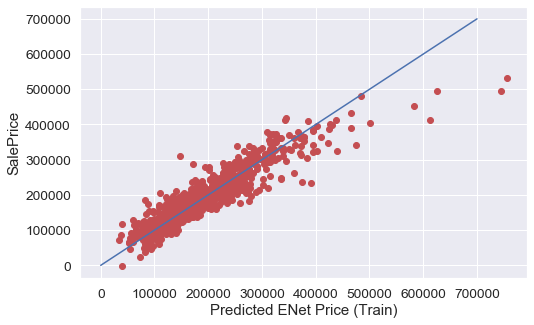

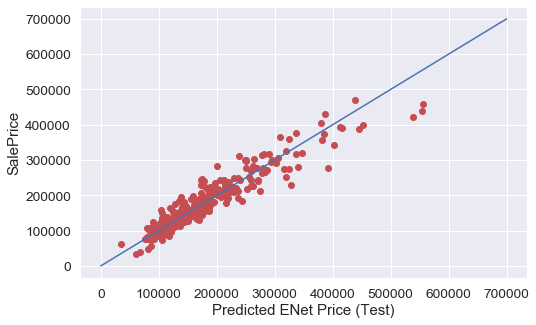

In [394]:
# visualisation of Train set predictions
import pylab as pl
# Plot outputs
%matplotlib inline
plt.figure(figsize=(8,5))
pl.plot(y_train,ENet_Predictions_train,'ro')
pl.plot([0,700000],[0,700000], 'b-')
pl.xlabel('Predicted ENet Price (Train)')
pl.ylabel('SalePrice')
pl.show()

# visualisation of Test set predictions
import pylab as pl
# Plot outputs
%matplotlib inline
plt.figure(figsize=(8,5))
pl.plot(y_test,ENet_Predictions_test,'ro')
pl.plot([0,700000],[0,700000], 'b-')
pl.xlabel('Predicted ENet Price (Test)')
pl.ylabel('SalePrice')
pl.show()

The plots above shows a connections between predicted prices and actual 'SalePrice' in Train and Test sets. The Test set plot shows a better connections.

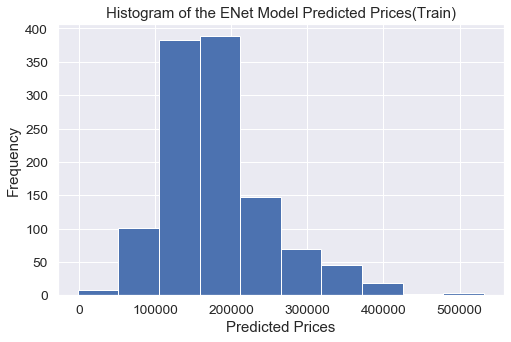

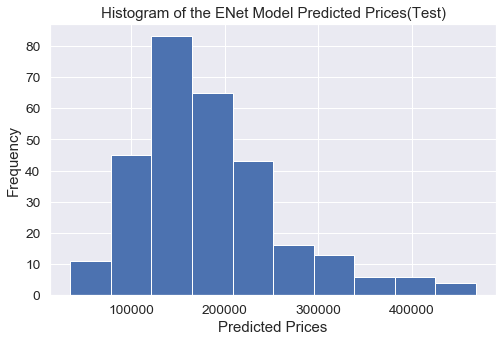

In [395]:
# visualisation of predicted prices and frequency
plt.figure(figsize=(8,5))
plt.hist(ENet_Predictions_train, color="b")
plt.title("Histogram of the ENet Model Predicted Prices(Train)")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(8,5))
plt.hist(ENet_Predictions_test, color="b")
plt.title("Histogram of the ENet Model Predicted Prices(Test)")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()

The histograms above depicts Predicted Prices on the X-axis; against their Frequency on the Y-axis. It shows a difference between Train and Test sets predicted prices and frequency. The Test set depicts better variety of predicted prices and frequency.

* ### Submission of ‘.csv’ file
 

The Elastic Net Regression model predictions will be submitted as 'csv' file.

In [396]:
# submission of 'csv' file with 'SalePrice' predictions.
sub = pd.DataFrame()
sub['Id'] = train_id
sub['SalePrice'] = Final_ENet_predictions
sub.to_csv('Predictions.csv', index=False)


_Anastasia Rizzo_